# Programming Assignment PRML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc_op

**Part 1**

a)

In [2]:
mean_classes = [(0, 0), (0, 1), (1, 1), (1, 0)]
var = 0.3
no_samples = 30
classes = list()

rng = np.random.default_rng()
for (x, y) in mean_classes:
  classes.append(np.array([rng.normal(x, np.sqrt(var), no_samples), rng.normal(y, np.sqrt(var), no_samples)]))

b)

In [3]:
x_train = np.concatenate(classes, axis=1).T
y_train = np.concatenate((-1*np.ones(no_samples), np.ones(no_samples)))
y_train = np.concatenate((y_train, y_train)).astype('int64')

c)

In [4]:
no_test_sam = 200
test_set = list()
for (x, y) in mean_classes:
  test_set.append(np.array([rng.normal(x, np.sqrt(var), no_test_sam), rng.normal(y, np.sqrt(var), no_test_sam)]))
x_test = np.concatenate(test_set, axis=1).T
y_test = np.concatenate((-1*np.ones(no_test_sam), np.ones(no_test_sam)))
y_test = np.concatenate((y_test, y_test)).astype('int64')

d)

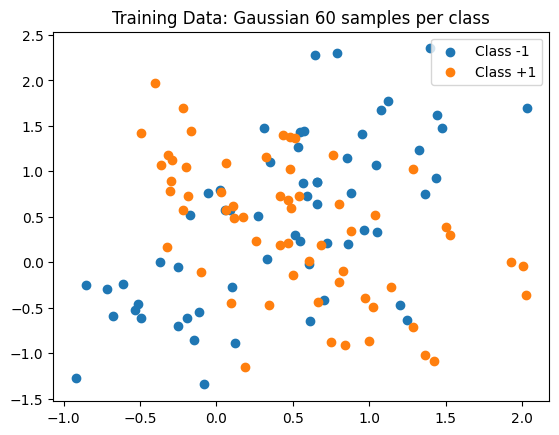

In [5]:
plt.figure()

labels = [-1, 1]
for label in labels:
    x = x_train[y_train == label]
    plt.scatter(x[:, 0], x[:, 1], marker='o', label=f"Class {label:+}")

plt.title("Training Data: Gaussian 60 samples per class")
plt.legend()
plt.show()

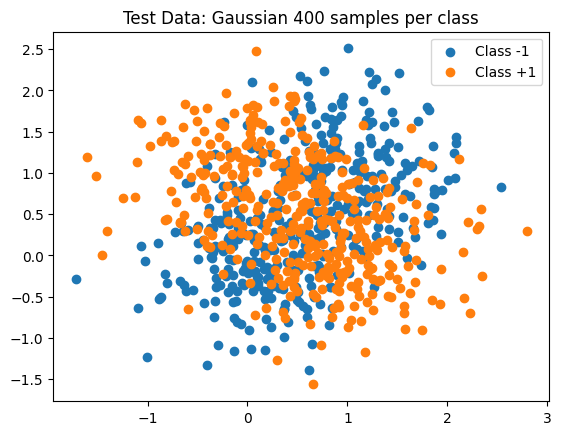

In [6]:
plt.figure()

labels = [-1, 1]  # Get unique labels
for label in labels:
    x = x_test[y_test == label]
    plt.scatter(x[:, 0], x[:, 1], marker='o', label=f"Class {label:+}")

plt.title("Test Data: Gaussian 400 samples per class")
plt.legend()
plt.show()

e)

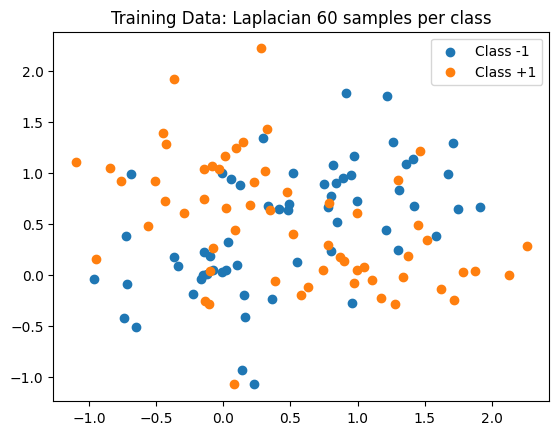

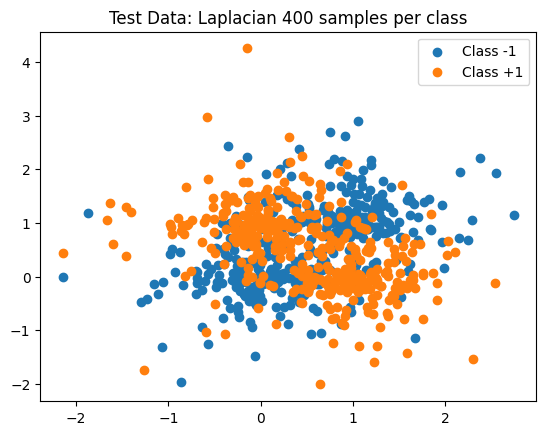

In [7]:
lap_classes = list()
for (x, y) in mean_classes:
  lap_classes.append(np.array([rng.laplace(x, np.sqrt(var/2), no_samples), rng.laplace(y, np.sqrt(var/2), no_samples)]))
x_lap_train = np.concatenate(lap_classes, axis = 1).T
y_lap_train = np.concatenate((-1*np.ones(no_samples), np.ones(no_samples)))
y_lap_train = np.concatenate((y_lap_train, y_lap_train)).astype('int64')

test_lap_set = list()
for (x, y) in mean_classes:
  test_lap_set.append(np.array([rng.laplace(x, np.sqrt(var/2), no_test_sam), rng.laplace(y, np.sqrt(var/2), no_test_sam)]))
x_lap_test = np.concatenate(test_lap_set, axis = 1).T
y_lap_test = np.concatenate((-1*np.ones(no_test_sam), np.ones(no_test_sam)))
y_lap_test = np.concatenate((y_lap_test, y_lap_test)).astype('int64')

plt.figure()
labels = [-1, 1]
for label in labels:
    x = x_lap_train[y_lap_train == label]
    plt.scatter(x[:, 0], x[:, 1], marker='o', label=f"Class {label:+}")
plt.title("Training Data: Laplacian 60 samples per class")
plt.legend()
plt.show()

plt.figure()
labels = [-1, 1]
for label in labels:
    x = x_lap_test[y_lap_test == label]
    plt.scatter(x[:, 0], x[:, 1], marker='o', label=f"Class {label:+}")
plt.title("Test Data: Laplacian 400 samples per class")
plt.legend()
plt.show()

**PART 2**

1)
a)

In [8]:
k = 5

def kNNClassify(x_train, y_train, x_test, k):
    y_pred = []

    for x in x_test:
        distances = np.sqrt(np.sum((x_train - x) ** 2, axis=1))
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]

        nearest_labels_binary = (nearest_labels + 1) // 2
        label_counts = np.bincount(nearest_labels_binary)
        predicted_label_binary = np.argmax(label_counts)
        predicted_label = 2 * predicted_label_binary - 1

        y_pred.append(predicted_label)

    return np.array(y_pred)

b)

In [9]:
def calculate_error(y_pred, y_test):
    count = 0
    for i in range(len(y_pred)):
        if y_pred[i] != y_test[i]:
            count += 1

    return count/len(y_pred)

y_pred = kNNClassify(x_train, y_train, x_test, k)

calculate_error(y_pred, y_test)

0.355

c)

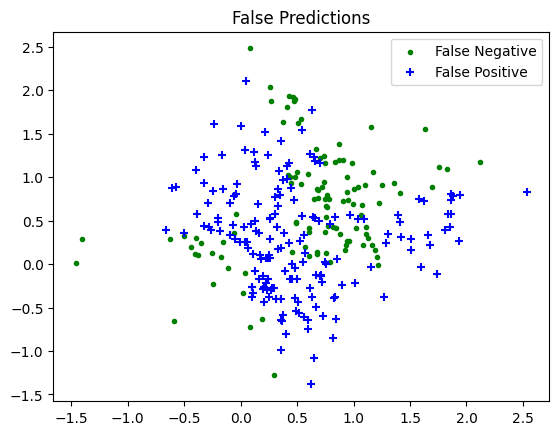

In [10]:
false_positive = []
false_negative = []

for i in range(len(y_test)):
    if y_pred[i] == 1 and y_test[i] == -1:
        false_positive.append(i)
    elif y_pred[i] == -1 and y_test[i] == 1:
        false_negative.append(i)

plt.figure()
plt.scatter(x_test[false_negative, 0], x_test[false_negative, 1], marker = '.', color = 'g', label = "False Negative")
plt.scatter(x_test[false_positive, 0], x_test[false_positive, 1], marker = '+', color = 'b', label = "False Positive")

plt.title(f"False Predictions")
plt.legend()
plt.show()

d)

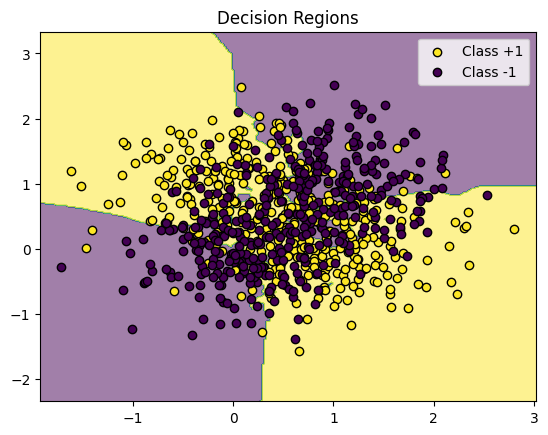

In [11]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', 12)

def decision_regions(x_train, y_train, x_test, y_test, k):

    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = kNNClassify(x_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=viridis, alpha=0.5)

    plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], label='Class +1', marker='o', color = viridis(12), edgecolor = 'k')
    plt.scatter(x_test[y_test == -1][:, 0], x_test[y_test == -1][:, 1], label='Class -1', marker='o', color = viridis(0), edgecolor = 'k')

    plt.legend()
    plt.title("Decision Regions")
    plt.show()

decision_regions(x_train, y_train, x_test, y_test, k)

2) a)

k =  1 :  [ 58.06 100.  ]
k =  3 :  [65.28 78.93]
k =  5 :  [66.39 74.4 ]
k =  7 :  [58.89 75.6 ]
k =  9 :  [64.44 74.88]
k =  11 :  [66.67 75.24]
k =  13 :  [63.89 73.21]
k =  15 :  [65.56 74.17]
k =  17 :  [65.  72.5]
k =  19 :  [63.06 74.17]
k =  21 :  [63.61 74.4 ]


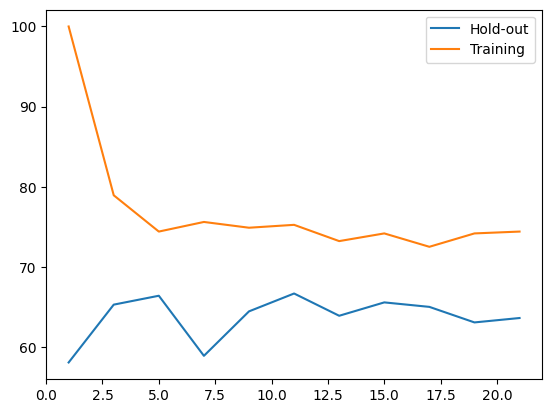

Best k for hold-out =  11


In [12]:
rho = 0.3
k = 5
fold = 10

def holdoutCVkNN(x, y, k, fold, rho):
    n = len(x)
    n_rho = int(n*rho)
    hold_out_accuracy = np.zeros(fold)
    train_accuracy = np.zeros(fold)
    for i in range(fold):
        permute = np.random.permutation(n)
        x_train = x[permute]
        y_train = y[permute]
        x_hold_out = x_train[:n_rho]
        y_hold_out = y_train[:n_rho]
        x_train = x_train[n_rho:]
        y_train = y_train[n_rho:]
        y_pred_hold_out = kNNClassify(x_train, y_train, x_hold_out, k)
        hold_out_accuracy[i] = np.count_nonzero(y_hold_out == y_pred_hold_out)/len(y_hold_out)
        y_pred_train = kNNClassify(x_train, y_train, x_train, k)
        train_accuracy[i] = np.count_nonzero(y_train == y_pred_train)/len(y_train)

    return np.round([np.mean(hold_out_accuracy)*100, np.mean(train_accuracy)*100], 2)

error = []
for k in range(1, 23, 2):
    knnout = holdoutCVkNN(x_train, y_train, k, fold, rho)
    print("k = ", k, ": ", knnout)
    error.append(knnout)

plt.plot(range(1, 23, 2), [x[0] for x in error], label="Hold-out")
plt.plot(range(1, 23, 2), [x[1] for x in error], label="Training")
plt.legend()
plt.show()

k_best = np.argmax([x[0] for x in error])*2 + 1
print('Best k for hold-out = ', k_best)

b)

In [13]:
best_k1 = []
for rho_c in [0.1, 0.3, 0.5, 0.7, 0.9]:
    errors = []
    for k in range(1, 23, 2):
        knnout = holdoutCVkNN(x_train, y_train, k, fold, rho)
        errors.append(knnout)
    best_k1.append(np.argmax([x[0] for x in errors])*2+1)
    print(f'Rho = {rho_c} :Best k for hold-out = ', np.argmax([x[0] for x in errors])*2+1)

best_k2 = []
for n_rep in [1, 5, 10, 20, 30]:
    errors = []
    for k in range(1, 23, 2):
        knnout = holdoutCVkNN(x_train, y_train, k, fold, rho)
        errors.append(knnout)
    best_k2.append(np.argmax([x[0] for x in errors])*2+1)
    print(f'No of Repetition = {str(n_rep)} : Best k for hold-out = ', np.argmax([x[0] for x in errors])*2+1)

Rho = 0.1 :Best k for hold-out =  17
Rho = 0.3 :Best k for hold-out =  9
Rho = 0.5 :Best k for hold-out =  19
Rho = 0.7 :Best k for hold-out =  11
Rho = 0.9 :Best k for hold-out =  21
No of Repetition = 1 : Best k for hold-out =  15
No of Repetition = 5 : Best k for hold-out =  17
No of Repetition = 10 : Best k for hold-out =  17
No of Repetition = 20 : Best k for hold-out =  19
No of Repetition = 30 : Best k for hold-out =  21


c)

In [14]:
y_pred_best = kNNClassify(x_train, y_train, x_test, k_best)
calculate_error(y_pred_best, y_test)

0.36125

**PART 2 (for Laplacian)**

In [15]:
k = 5

b)

In [16]:
y_lap_pred = kNNClassify(x_lap_train, y_lap_train, x_lap_test, k)

calculate_error(y_lap_pred, y_lap_test)

0.28125

c)

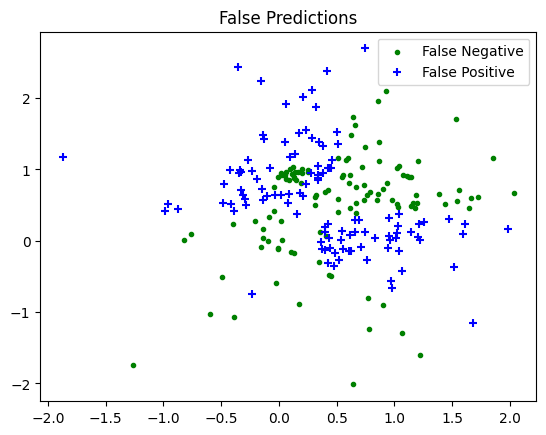

In [17]:
false_positive = []
false_negative = []

for i in range(len(y_lap_test)):
    if y_lap_pred[i] == 1 and y_lap_test[i] == -1:
        false_positive.append(i)
    elif y_lap_pred[i] == -1 and y_lap_test[i] == 1:
        false_negative.append(i)

plt.figure()
plt.scatter(x_lap_test[false_negative, 0], x_lap_test[false_negative, 1], marker = '.', color = 'g', label = "False Negative")
plt.scatter(x_lap_test[false_positive, 0], x_lap_test[false_positive, 1], marker = '+', color = 'b', label = "False Positive")

plt.title(f"False Predictions")
plt.legend()
plt.show()

d)

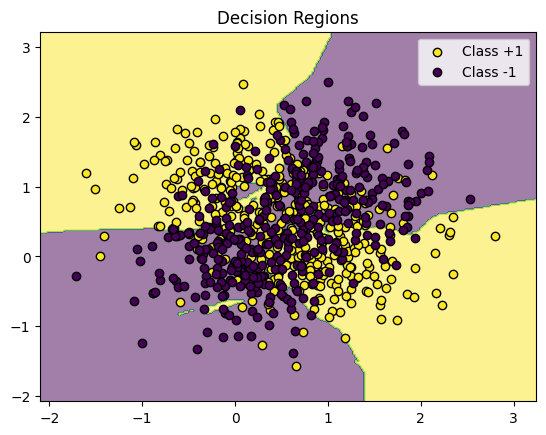

In [18]:
decision_regions(x_lap_train, y_lap_train, x_test, y_test, k)

2) a)

k =  1 :  [ 59.44 100.  ]
k =  3 :  [66.94 81.31]
k =  5 :  [70.56 78.69]
k =  7 :  [71.94 78.57]
k =  9 :  [76.11 77.86]
k =  11 :  [76.39 76.79]
k =  13 :  [70.   78.21]
k =  15 :  [74.44 77.02]
k =  17 :  [73.89 77.14]
k =  19 :  [71.39 76.79]
k =  21 :  [72.78 78.45]


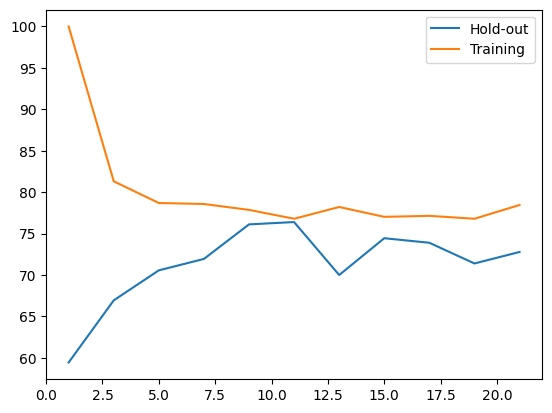

Best k for hold-out =  11


In [19]:
rho = 0.3
k = 5
fold = 10

error = []
for k in range(1, 23, 2):
    knnout = holdoutCVkNN(x_lap_train, y_lap_train, k, fold, rho)
    print("k = ", k, ": ", knnout)
    error.append(knnout)

plt.plot(range(1, 23, 2), [x[0] for x in error], label="Hold-out")
plt.plot(range(1, 23, 2), [x[1] for x in error], label="Training")
plt.legend()
plt.show()

k_best = np.argmax([x[0] for x in error])*2 + 1
print('Best k for hold-out = ', k_best)

b)

In [20]:
best_k1 = []
for rho_c in [0.1, 0.3, 0.5, 0.7, 0.9]:
    errors = []
    for k in range(1, 23, 2):
        knnout = holdoutCVkNN(x_train, y_train, k, fold, rho)
        errors.append(knnout)
    best_k1.append(np.argmax([x[0] for x in errors])*2+1)
    print(f'Rho = {rho_c} :Best k for hold-out = ', np.argmax([x[0] for x in errors])*2+1)

best_k2 = []
for n_rep in [1, 5, 10, 20, 30]:
    errors = []
    for k in range(1, 23, 2):
        knnout = holdoutCVkNN(x_train, y_train, k, fold, rho)
        errors.append(knnout)
    best_k2.append(np.argmax([x[0] for x in errors])*2+1)
    print(f'No of Repetition = {str(n_rep)} : Best k for hold-out = ', np.argmax([x[0] for x in errors])*2+1)

Rho = 0.1 :Best k for hold-out =  17
Rho = 0.3 :Best k for hold-out =  9
Rho = 0.5 :Best k for hold-out =  17
Rho = 0.7 :Best k for hold-out =  21
Rho = 0.9 :Best k for hold-out =  17
No of Repetition = 1 : Best k for hold-out =  11
No of Repetition = 5 : Best k for hold-out =  17
No of Repetition = 10 : Best k for hold-out =  17
No of Repetition = 20 : Best k for hold-out =  13
No of Repetition = 30 : Best k for hold-out =  17


c)

In [21]:
y_lap_pred_best = kNNClassify(x_lap_train, y_lap_train, x_lap_test, k_best)
calculate_error(y_lap_pred_best, y_lap_test)

0.24875

PART 3

a)

In [22]:
mean_classes = [(0, 0), (0, 1), (1, 1), (1, 0)]
var = 0.3
no_samples = 30
classes = list()

rng = np.random.default_rng()
for (x, y) in mean_classes:
  classes.append(np.array([rng.normal(x, np.sqrt(var), no_samples), rng.normal(y, np.sqrt(var), no_samples)]))

In [23]:
x_train = np.concatenate(classes, axis = 1).T
y_train = np.concatenate([[-1] * no_samples * 2, [1] * no_samples * 2])

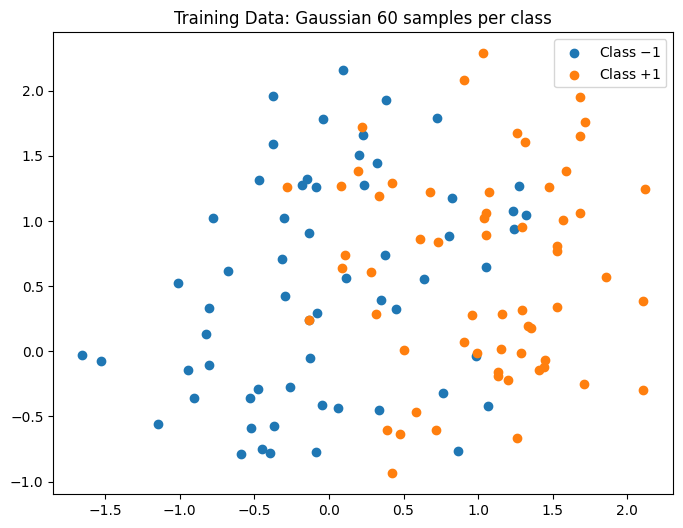

In [24]:
plt.figure(figsize=(8, 6))

for label in np.unique(y_train):
    plt.scatter(x_train[y_train == label, 0], x_train[y_train == label, 1], marker = 'o', label = f"Class ${label:+}$")
plt.title("Training Data: Gaussian 60 samples per class")
plt.legend()
plt.show()

In [25]:
no_test_sam = 200
test_set = list()
for (x, y) in mean_classes:
  test_set.append(np.array([rng.normal(x, np.sqrt(var), no_test_sam), rng.normal(y, np.sqrt(var), no_test_sam)]))
x_test = np.concatenate(test_set, axis = 1).T
y_test = np.concatenate([[-1] * no_test_sam * 2, [1] * no_test_sam * 2])

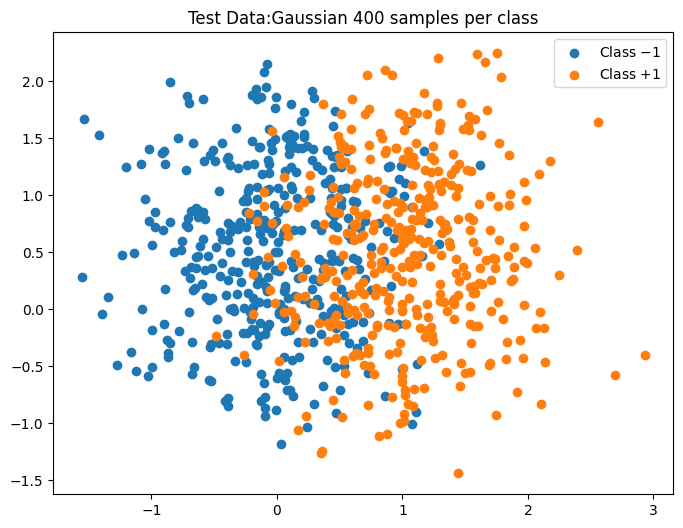

In [26]:
plt.figure(figsize=(8, 6))

for label in np.unique(y_test):
    plt.scatter(x_test[y_test == label, 0], x_test[y_test == label, 1], marker = 'o', label = f"Class ${label:+}$")

plt.title("Test Data:Gaussian 400 samples per class")
plt.legend()
plt.show()

In [27]:
def hinge_loss(x):
    return max(0, 1 - x)
C = 5

def svm_fn(Theta, c = C, x = x_train, y = y_train):
    output = np.linalg.norm(Theta[:2]) ** 2
    for i in range(len(x)):
        output += c * np.sum(hinge_loss(y[i]*(np.dot(Theta[:2], [x[i][0], x[i][1]]) + Theta[2])))
    return output

def soft_margin_svm():
    return sc_op.minimize(svm_fn, np.zeros(3))

Theta = soft_margin_svm().x
Theta

array([ 1.58344933, -0.07143346, -0.80721951])

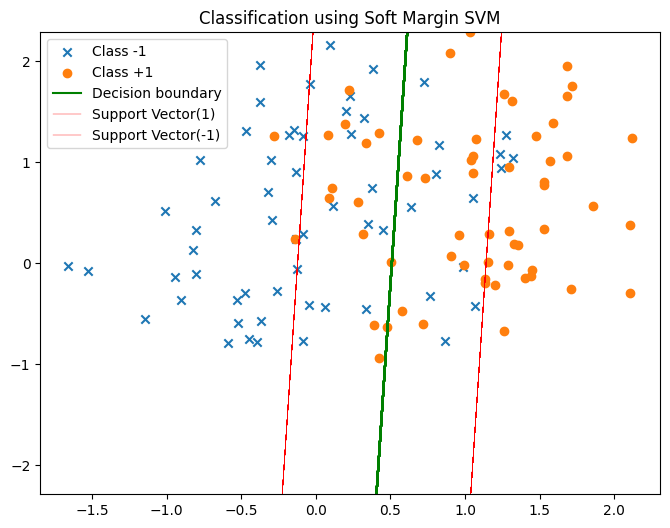

In [28]:
plt.figure(figsize=(8, 6))

plt.scatter(x_train[y_train == -1][:, 0], x_train[y_train == -1][:, 1], label='Class -1', marker='x')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label='Class +1', marker='o')
plt.plot(x_train[:, 0], -Theta[0]*x_train[:, 0]/Theta[1] - Theta[2]/Theta[1], label='Decision boundary', color='green')
plt.plot(x_train[:, 0], -Theta[0]*x_train[:, 0]/Theta[1] - Theta[2]/Theta[1] + 1/Theta[1], color='red', lw=0.3, label='Support Vector(1)')
plt.plot(x_train[:, 0], -Theta[0]*x_train[:, 0]/Theta[1] - Theta[2]/Theta[1] - 1/Theta[1], color='red', lw=0.3, label='Support Vector(-1)')
plt.ylim(-max(abs(x_train[:, 1])), max(abs(x_train[:, 1])))
plt.title('Classification using Soft Margin SVM')
plt.legend()
plt.show()

b)

In [29]:
y_pred = np.sign(np.dot(x_test, Theta[:2]) + Theta[2])

def accuracy(y_pred, y_test):
    y_pred = np.array(y_pred)
    y_test = np.array(y_test)
    no_samples = np.shape(y_pred)[0]
    true_positive = np.sum((y_pred == 1) & (y_test == 1))
    true_negative = np.sum((y_pred == -1) & (y_test == -1))
    return (true_positive + true_negative)/no_samples

print(accuracy(y_pred, y_test) * 100)

82.75


In [30]:
rho = 0.3
c = 5
fold = 10

def holdoutSVM(x, y, c, fold, rho):
    n = len(x)
    n_rho = int(n*rho)
    hold_out_accuracy = np.zeros(fold)
    train_accuracy = np.zeros(fold)
    for i in range(fold):
        permute = np.random.permutation(n)
        x_train = x[permute]
        y_train = y[permute]
        x_hold_out = x_train[:n_rho]
        y_hold_out = y_train[:n_rho]
        x_train = x_train[n_rho:]
        y_train = y_train[n_rho:]
        Theta = soft_margin_svm().x
        y_pred_hold_out = np.sign(np.dot(x_hold_out, Theta[:2]) + Theta[2])
        hold_out_accuracy[i] = accuracy(y_hold_out, y_pred_hold_out)
        y_pred_train = np.sign(np.dot(x_train, Theta[:2]) + Theta[2])
        train_accuracy[i] = accuracy(y_train, y_pred_train)

    return np.round([np.mean(hold_out_accuracy)*100, np.mean(train_accuracy)*100], 2)

acc = []
for c in range(1, 10):
    ac = holdoutSVM(x_train, y_train, c, fold, rho)
    print(f"For c = {c}: {ac}")
    acc.append(ac)


For c = 1: [74.17 77.74]
For c = 2: [75.83 77.02]
For c = 3: [78.89 75.71]
For c = 4: [75.56 77.14]
For c = 5: [75.83 77.02]
For c = 6: [78.89 75.71]
For c = 7: [77.78 76.19]
For c = 8: [75.   77.38]
For c = 9: [76.67 76.67]


In [31]:
c_best = np.argmax([x[0] for x in acc]) + 1
print(f'C = {c_best} is the best C')

C = 3 is the best C


Rho = 0.1: C = 1 is the best
Rho = 0.2: C = 8 is the best
Rho = 0.30000000000000004: C = 1 is the best
Rho = 0.4: C = 3 is the best
Rho = 0.5: C = 6 is the best
Rho = 0.6: C = 5 is the best
Rho = 0.7000000000000001: C = 2 is the best
Rho = 0.8: C = 6 is the best


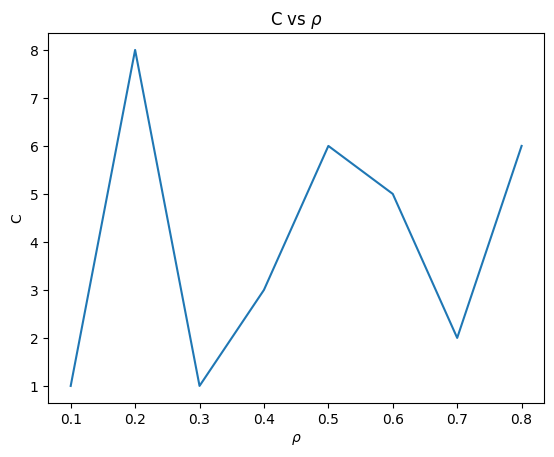

In [34]:
best_C_rho = []
for rho in np.arange(0.1, 0.9, 0.1):
    acc = []
    for c in range(1, 10):
        ac = holdoutSVM(x_train, y_train, c, fold, rho)
        acc.append(ac)
    best_C_rho.append(np.argmax([x[0] for x in acc]) + 1)
    print(f'Rho = {rho}: C = {np.argmax([x[0] for x in acc]) + 1} is the best')

plt.plot(np.arange(0.1, 0.9, 0.1), best_C_rho)
plt.xlabel("$\\rho$")
plt.ylabel("C")
plt.title("C vs $\\rho$")
plt.show()

Repetitions = 1: C = 3
Repetitions = 6: C = 8
Repetitions = 11: C = 9
Repetitions = 16: C = 1
Repetitions = 21: C = 6
Repetitions = 26: C = 7
Repetitions = 31: C = 4


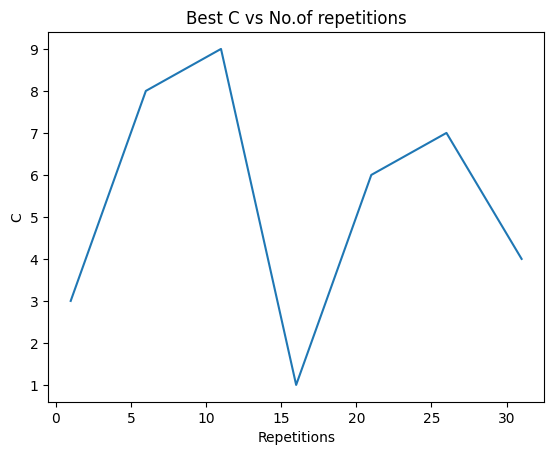

In [ ]:
best_C_fold = []
for fold in range(1,32,5):
    acc = []
    for C in range(1, 10):
        ac = holdoutSVM(x_train, y_train, c, fold, rho = 0.3)
        acc.append(ac)
    best_C_fold.append(np.argmax([x[0] for x in acc]) + 1)
    print(f'Repetitions = {fold}: C = {np.argmax([x[0] for x in acc]) + 1}')

plt.plot(range(1,32,5), best_C_fold)
plt.xlabel('Repetitions')
plt.ylabel('C')
plt.title('Best C vs No.of repetitions')
plt.show()

c)

In [ ]:
rho = 0.3
k = 5
fold = 10

def kNNClassify(x_train, y_train, x_test, k):
    y_pred = []

    for x in x_test:
        distances = np.sqrt(np.sum((x_train - x) ** 2, axis=1))
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]

        nearest_labels_binary = (nearest_labels + 1) // 2
        label_counts = np.bincount(nearest_labels_binary)
        predicted_label_binary = np.argmax(label_counts)
        predicted_label = 2 * predicted_label_binary - 1

        y_pred.append(predicted_label)

    return np.array(y_pred)

def holdoutCVkNN(x, y, k, fold, rho):
    n = len(x)
    n_rho = int(n*rho)
    hold_out_accuracy = np.zeros(fold)
    train_accuracy = np.zeros(fold)
    for i in range(fold):
        permute = np.random.permutation(n)
        x_train = x[permute]
        y_train = y[permute]
        x_hold_out = x_train[:n_rho]
        y_hold_out = y_train[:n_rho]
        x_train = x_train[n_rho:]
        y_train = y_train[n_rho:]
        y_pred_hold_out = kNNClassify(x_train, y_train, x_hold_out, k)
        hold_out_accuracy[i] = np.count_nonzero(y_hold_out == y_pred_hold_out)/len(y_hold_out)
        y_pred_train = kNNClassify(x_train, y_train, x_train, k)
        train_accuracy[i] = np.count_nonzero(y_train == y_pred_train)/len(y_train)

    return np.round([np.mean(hold_out_accuracy)*100, np.mean(train_accuracy)*100], 2)

acc = []
for k in range(1, 23, 2):
    ac = holdoutCVkNN(x_train, y_train, k, fold, rho)
    print("k = ", k, ": ", ac)
    acc.append(ac)

k_best = np.argmax([x[0] for x in acc])*2 + 1
print('Best k for kNN = ', k_best)
y_pred_best_kNN = kNNClassify(x_train, y_train, x_test, k_best)


k =  1 :  [ 76.94 100.  ]
k =  3 :  [76.39 89.4 ]
k =  5 :  [81.39 85.48]
k =  7 :  [78.89 84.88]
k =  9 :  [81.67 84.4 ]
k =  11 :  [77.78 85.6 ]
k =  13 :  [82.5 84.4]
k =  15 :  [82.78 83.93]
k =  17 :  [80.56 84.52]
k =  19 :  [83.33 82.5 ]
k =  21 :  [81.67 83.1 ]
Best k for kNN =  19


In [ ]:
def hinge_loss(x):
    return max(0, 1 - x)

C = c_best

def svm_fn(Theta, c = C, x = x_train, y = y_train):
    output = np.linalg.norm(Theta[:2]) ** 2
    for i in range(len(x)):
        output += c * np.sum(hinge_loss(y[i]*(np.dot(Theta[:2], [x[i][0], x[i][1]]) + Theta[2])))
    return output

def soft_margin_svm():
    return sc_op.minimize(svm_fn, np.zeros(3))

Theta = soft_margin_svm().x

y_pred_best_SVM = np.sign(np.dot(x_test, Theta[:2]) + Theta[2])

In [ ]:
kNN_acc = accuracy(y_test, y_pred_best_kNN)
SVM_acc = accuracy(y_test, y_pred_best_SVM)

print('Accuracy via kNN: ', kNN_acc)
print('Accuracy via SVM: ', SVM_acc)

if kNN_acc > SVM_acc:
    print('kNN is better')

else:
    print('SVM is better')


Accuracy via kNN:  0.81125
Accuracy via SVM:  0.81125
SVM is better
